In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers

Using TensorFlow backend.


## Load the dataset

In [2]:
df = pd.read_csv('Accelerating_particle.csv')

## Explore the dataset

In [3]:
df.head()

,t,z
0,0.00000,0.581492
1,0.01001,0.109580
2,0.02002,0.736652
3,0.03003,1.485984
4,0.04004,1.743183


In [4]:
df.shape

(1000, 2)

In [5]:
df.describe()

,t,z
count,1000.000000,1000.000000
mean,5.000000,17.649912
std,2.891085,14.983189
min,0.000000,-1.356662
25%,2.500000,3.992397
50%,5.000000,13.412407
75%,7.500000,29.009230
max,10.000000,51.253266


## Plot the data set

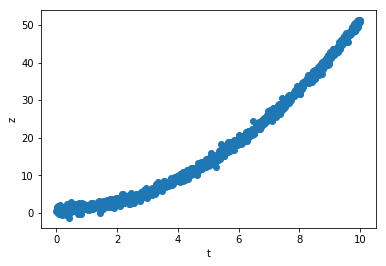

In [6]:
plt.scatter(df['t'],df['z'])
plt.xlabel('t')
plt.ylabel('z')
plt.show()

## Split into train and test sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[['t']], df['z'], test_size=0.33, random_state=0)

## Scale the features

In [8]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

## Train the model

In [9]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))

In [10]:
model.compile(loss='mse', optimizer=optimizers.SGD(lr=0.001))

## Train the model

In [11]:
history = model.fit(
    x_train_s,
    y_train,
    batch_size=1,
    epochs=10)

Epoch 1/10
670/670 [==============================] - 1s - loss: 70.2996     
Epoch 2/10
670/670 [==============================] - 1s - loss: 3.4813     
Epoch 3/10
670/670 [==============================] - 1s - loss: 1.4407     
Epoch 4/10
670/670 [==============================] - 1s - loss: 0.9790     
Epoch 5/10
670/670 [==============================] - 1s - loss: 0.8012     
Epoch 6/10
670/670 [==============================] - 1s - loss: 0.7573     
Epoch 7/10
670/670 [==============================] - 1s - loss: 0.7181     
Epoch 8/10
670/670 [==============================] - 1s - loss: 0.6898     
Epoch 9/10
670/670 [==============================] - 1s - loss: 0.6667     
Epoch 10/10
670/670 [==============================] - 1s - loss: 0.6526     


## Make predictions and evaluate the model

In [12]:
y_pred = model.predict(x_test_s)[:,0]

In [13]:
r2_score(y_test,y_pred)

0.9979574257742974

In [14]:
x_fine = np.linspace(0,1,100).reshape(-1,1)
y_fine = model.predict(x_fine)

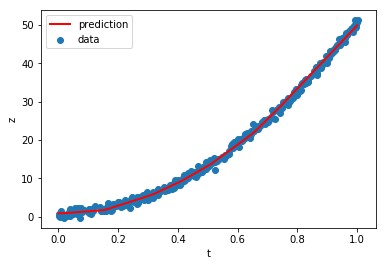

In [15]:
plt.scatter(x_test_s,y_test, label='data')
plt.plot(x_fine,y_fine,c='r',lw=2,label='prediction')
plt.xlabel('t')
plt.ylabel('z')
plt.legend()
plt.show()